<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/PyTorch/IntroDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning with PyTorch

## Introduction to PyTorch

### Tensors

In [2]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create a tensor from numpy array
array = np.array([
    [1, 2, 3],
    [4, 5, 6]
], dtype=np.int32)
tensor = torch.tensor(array)
if torch.cuda.is_available():
    tensor = tensor.cuda()

# Display the tensor shape, data type, device
print("Tensor shape:", tensor.shape)
print("Tensor dtype:", tensor.dtype)
print("Tensor device:", tensor.device)

# Create two tensors from the arrays
array_a = np.array([
    [1, 1, 1],
    [2, 3, 4],
    [4, 5, 6]
], dtype=np.int32)
array_b = np.array([
    [7, 5, 4],
    [2, 2, 8],
    [6, 3, 8]
], dtype=np.int32)
tensor_a = torch.tensor(array_a)
tensor_b = torch.tensor(array_b)
if torch.cuda.is_available():
    tensor_a = tensor_a.cuda()
    tensor_b = tensor_b.cuda()

# Subtract tensor_b from tensor_a
tensor_c = tensor_a - tensor_b
# Multiply each element of tensor_a with each element of tensor_b
tensor_d = tensor_a * tensor_b
# Add tensor_c with tensor_d
tensor_e = tensor_c + tensor_d
print(tensor_e)

Tensor shape: torch.Size([2, 3])
Tensor dtype: torch.int32
Tensor device: cuda:0
tensor([[ 1,  1,  1],
        [ 4,  7, 28],
        [22, 17, 46]], device='cuda:0', dtype=torch.int32)


### Neural network

In [2]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create input tensor
input = np.array([
    [-0.0014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]
], dtype=np.float32)
input = torch.tensor(input)

# Implement a small neural network with three linear layers
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=10, out_features=18),
    torch.nn.Linear(in_features=18, out_features=20),
    torch.nn.Linear(in_features=20, out_features=5)
)
if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

print("Weight:", model[2].weight)
print("Bias:", model[2].bias)

# Pass input_tensor to model to obtain output
output = model(input)
print("Output:", output)

Weight: Parameter containing:
tensor([[-0.1103, -0.1057,  0.1378, -0.1948,  0.0273,  0.1975,  0.0383,  0.0608,
         -0.1302, -0.0031,  0.0123,  0.0549,  0.0869,  0.1943, -0.1707,  0.0067,
         -0.1117, -0.1769, -0.0179, -0.1968],
        [ 0.1561,  0.0259, -0.1205,  0.1169, -0.2116, -0.0865, -0.0436, -0.1900,
         -0.1422, -0.0365,  0.1697,  0.2159,  0.1423, -0.1335, -0.1463,  0.1951,
          0.0791,  0.0059,  0.0303, -0.1797],
        [-0.0747,  0.2152, -0.0551, -0.0112, -0.1857, -0.1251, -0.0046, -0.1389,
         -0.0277,  0.0910, -0.2187,  0.0664, -0.1479, -0.1091,  0.0858,  0.1778,
         -0.0611, -0.0918, -0.2022, -0.1153],
        [-0.1958, -0.0512,  0.0456, -0.2095,  0.1952,  0.1403, -0.2189, -0.1068,
          0.0729, -0.0459, -0.0244, -0.1010,  0.1796, -0.1250,  0.1854,  0.0144,
          0.0449,  0.1744, -0.0368, -0.1273],
        [-0.0362,  0.1814, -0.1659,  0.0508, -0.2198,  0.1172,  0.0826,  0.0095,
          0.0960,  0.0003,  0.1237, -0.1770, -0.0328,  0.

## Training Neural Network

### Activation functions

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

# Create input data of shape 5x6
input = np.array([
    [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -0.19520, -0.3398],
    [0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
    [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
], dtype=np.float32)
input = torch.tensor(input)

# Specify model has three classes
n_classes = 3
# Implement a small neural network for multiclass classification model
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=6, out_features=4), # First linear layer
    torch.nn.Linear(in_features=4, out_features=n_classes), # Second linear layer
    # Apply softmax activation on the score tensor along the last dimension
    torch.nn.Softmax(dim=-1)
)
if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

# Pass input data through model
probabilities = model(input)
# Return probabilities
print("Probabilities shape:", probabilities.shape)
print("Probabilities:", probabilities)

Probabilities shape: torch.Size([5, 3])
Probabilities: tensor([[0.2277, 0.1865, 0.5858],
        [0.4008, 0.3053, 0.2938],
        [0.3929, 0.2855, 0.3216],
        [0.3409, 0.2591, 0.4000],
        [0.2445, 0.2576, 0.4979]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


### Loss functions

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

y = torch.tensor([2])
scores = np.array([
    [0.1, 6.0, -2.0, 3.2]
], dtype=np.float32)
scores = torch.tensor(scores)
if torch.cuda.is_available():
    y = y.cuda()
    scores = scores.cuda()

# Create a one-hot encoded vector of the label y
one_hot_target = torch.nn.functional.one_hot(
    input=y, num_classes=scores.shape[1])
print("One hot encoding for 2nd class:", one_hot_target)

# Create the cross entropy loss function
criterion = torch.nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(input=scores, target=one_hot_target.float())
print("Loss:", loss)

One hot encoding for 2nd class: tensor([[0, 0, 1, 0]], device='cuda:0')
Loss: tensor(8.0619, device='cuda:0')


### Update parameters

In [ ]:
import torch
torch.manual_seed(seed=42)

# Create the model and run a forward pass
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=16, out_features=8),
    torch.nn.Linear(in_features=8, out_features=4),
    torch.nn.Linear(in_features=4, out_features=2)
)
if torch.cuda.is_available():
    sample = sample.cuda()
    model = model.cuda()

pred = model(sample)
# Calculate the loss and compute the gradients
criterion = torch.nn.CrossEntropyLoss()
# Calculate the loss
loss = criterion(input=pred, target=target)
# Compute the gradients of the loss
loss.backward()

# Learning rate is typically small
lr = 0.001
# Update the weights of the first linear layer
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad
# Update the biases of the first linear layer
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

# Create the optimizer
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.001
)
# Update the model's parameters using the optimizer
optimizer.step()

### Training loop

In [ ]:
import torch
torch.manual_seed(seed=42)

# Create the dataset and the dataloader
dataset = torch.utils.data.TensorDataset(
    torch.tensor(features).float(), torch.tensor(target).float()
)
dataloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=4, shuffle=True
)
# Create the model
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=2),
    torch.nn.Linear(in_features=2, out_features=1)
)
if torch.cuda.is_available():
    model = model.cuda()

# Create the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(
    params=model.parameters(), lr=0.001
)
# Loop over the number of epochs and then the dataloader
for epoch in range(num_epochs):
    for feature, target in dataloader:
        # Set the gradients to zero
        optimizer.zero_grad()
        # Get feature and target from the dataloader
        if torch.cuda.is_available():
            feature = feature.cuda()
            target = target.cuda()
        # Run a forward pass
        pred = model(feature)
        # Compute loss and gradients
        loss = criterion(input=pred, target=target)
        loss.backward()
        # Update the parameters
        optimizer.step()

## Hyperparameters

### Activation functions

In [ ]:
import torch
torch.manual_seed(seed=42)

# Apply leaky ReLU function on x, and calculate gradients
x = torch.tensor(-3.0, dtype=torch.float32,
    requires_grad=True)
# Create a leakly ReLU function with PyTorch
leaky_relu = torch.nn.LeakyReLU(
    negative_slope=0.05)

y = leaky_relu(x)
y.backward()
# Print the gradient of the leaky ReLU function for x
print("Gradient:", x.grad)

Gradient: tensor(0.0500)


### Number of parameters

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

def calculate_capacity(model):
    total = 0
    # Calculate the number of parameters in the model
    for p in model.parameters():
        total += p.numel()
    return total

input = np.array([
    [3, 4, 6, 2, 3, 6, 8, 9]
], dtype=np.float32)
input = torch.tensor(input)
# Create a neural network
n_features = 8
n_classes = 2
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=n_features, out_features=8),
    torch.nn.Linear(in_features=8, out_features=6),
    torch.nn.Linear(in_features=6, out_features=4),
    torch.nn.Linear(in_features=4, out_features=n_classes)
)
if torch.cuda.is_available():
    input = input.cuda()
    model = model.cuda()

print("Total parameters:", calculate_capacity(model))

output = model(input)
print("Output:", output)

Total parameters: 164
Output: tensor([[-0.0624, -0.5327]], device='cuda:0', grad_fn=<AddmmBackward0>)


### Layer initialization & transfer learning

In [42]:
import torch
torch.manual_seed(seed=42)

model = torch.nn.Sequential(
    torch.nn.Linear(in_features=64, out_features=128),
    torch.nn.Linear(in_features=128, out_features=256)
)
# Use uniform initialization for layer0 and layer1 weights
torch.nn.init.uniform_(model[0].weight)
torch.nn.init.uniform_(model[1].weight)

if torch.cuda.is_available():
    model = model.cuda()

for name, param in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name=='0.weight' or name=='0.bias':
        # Freeze the parameters
        param.requires_grad = False
    # Check if the parameters belong to the second layer
    if name=='1.weight' or name=='1.bias':
        # Freeze the parameters
        param.requires_grad = False

torch.save(obj=model, f='model.pth')
model = torch.load(f='model.pth')
print("Model layer1 min weight:", model[1].weight.min())
print("Model layer1 max weight:", model[1].weight.max())

Model layer1 min weight: tensor(2.6405e-05, device='cuda:0')
Model layer1 max weight: tensor(0.9999, device='cuda:0')


## Evaluating Models

### TensorDataset

Dataset: (tensor([0.3224, 0.6560, 0.5887, 0.4714], device='cuda:0'), tensor([1.], device='cuda:0'))
X shape: torch.Size([11, 4]) 
y shape: torch.Size([11, 1])


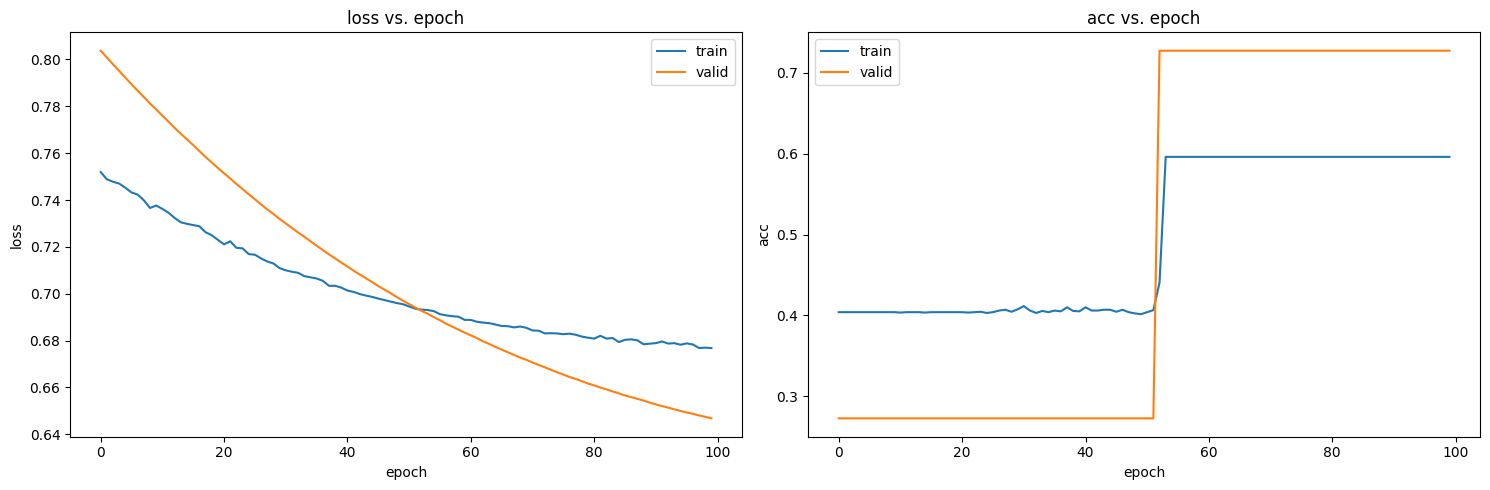

In [1]:
import os
import numpy as np
np.random.seed(seed=42)
import pandas as pd
import torch
torch.manual_seed(seed=42)
import torchmetrics
%matplotlib Inline
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs('data', exist_ok=True)
df = pd.read_csv('./data/water_potability.csv')
# Define input features
features = df[['ph', 'Sulfate', 'Conductivity', 'Organic_carbon']]
features = np.array(features, dtype=np.float32)
# Define target features (ground truth)
target = df['Potability']
target = np.array(target, dtype=np.float32)
# Load the different columns into two PyTorch tensors
features = torch.tensor(features)
target = torch.tensor(target).view(-1, 1)
if torch.cuda.is_available():
    features = features.cuda()
    target = target.cuda()
# Instantiate dataset class
dataset = torch.utils.data.TensorDataset(features, target)
print("Dataset:", dataset[-1])

# Create a dataloader using the above dataset
indices = np.arange(target.shape[0])
np.random.shuffle(indices)
trainloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=64, shuffle=False,
    sampler=torch.utils.data.SubsetRandomSampler(indices=indices[:2000])
)
validloader = torch.utils.data.DataLoader(
    dataset=dataset, batch_size=64, shuffle=False,
    sampler=torch.utils.data.SubsetRandomSampler(indices=indices[2000:])
)
x, y = next(iter(validloader))
print("X shape:", x.shape, "\ny shape:", y.shape)

# Create a small neural network, set the dropout probability to 0.3
model = torch.nn.Sequential(
    torch.nn.Linear(in_features=4, out_features=4),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(in_features=4, out_features=2),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.1),
    torch.nn.Linear(in_features=2, out_features=1),
    torch.nn.Sigmoid()
)
torch.nn.init.kaiming_uniform_(tensor=model[0].weight)
torch.nn.init.kaiming_uniform_(tensor=model[3].weight)
torch.nn.init.kaiming_uniform_(tensor=model[6].weight)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(params=model.parameters(),
    lr=3e-4, weight_decay=1e-5)
acc = torchmetrics.Accuracy(task="binary")
if torch.cuda.is_available():
    model = model.cuda()
    acc = acc.cuda()

history = {
    "train_loss": [], "train_acc": [],
    "valid_loss": [], "valid_acc": []
}
for epoch in range(100):
    train_loss = 0.0
    for features, labels in trainloader:
        # Run the forward pass
        preds = model(features)
        # Calculate accuracy over the batch
        acc(target=labels, preds=(preds>=0.5).float())
        optimizer.zero_grad()
        # Calculate the loss
        loss = criterion(input=preds, target=labels)
        # Calculate the gradients
        loss.backward()
        optimizer.step()
        # Calculate and sum the loss
        train_loss += loss.item()
    train_loss = train_loss / len(trainloader)
    history['train_loss'].append(train_loss)
    # Calculate accuracy over the whole epoch
    train_acc = acc.compute().item()
    history["train_acc"].append(train_acc)
    acc.reset()

    valid_loss = 0.0
    # Set the model in evaluation mode
    model.eval()
    # Speed up the forward pass
    with torch.no_grad():
        for features, labels in validloader:
            # Run the forward pass
            preds = model(features)
            # Calculate accuracy over the batch
            acc(target=labels, preds=(preds>=0.5).float())
            # Calculate the loss
            loss = criterion(input=preds, target=labels)
            # Sum the current loss to the validation_loss variable
            valid_loss += loss.item()
        # Calculate the mean loss value
        valid_loss = valid_loss / len(validloader)
        history['valid_loss'].append(valid_loss)
        # Calculate accuracy over the whole epoch
        valid_acc = acc.compute().item()
        history['valid_acc'].append(valid_acc)
        acc.reset()
    # Set the model back to training model
    model.train()

df_history = pd.DataFrame(history)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
for ax, m in zip(axes, ['loss', 'acc']):
    sns.lineplot(ax=ax, data=df_history, label='train',
        x=df_history.index, y=f'train_{m}')
    try:
        sns.lineplot(ax=ax, data=df_history, label='valid',
            x=df_history.index, y=f'valid_{m}')
    except Exception:
        pass
    ax.legend(loc='best')
    ax.set_xlabel(xlabel='epoch')
    ax.set_ylabel(ylabel=f'{m}')
    ax.set_title(label=f'{m} vs. epoch')
fig.tight_layout()
plt.show()

### Hyperparameter search

In [ ]:
import numpy as np
np.random.seed(seed=42)
import torch
torch.manual_seed(seed=42)

values = []
for idx in range(10):
    # Randomly sample a learning rate factor between 0.01 and 0.0001
    factor = np.random.uniform(2, 4)
    lr = 10 ** -factor
    # Randomly sample a momentum between 0.85 and 0.99
    momentum = np.random.uniform(0.85, 0.99)
    values.append((lr, momentum))